# MLBOOTCAMP : LOGISTIC REGRESSION - THEORY

# Logistic Regression

Classification techniques are an essential part of machine learning and data mining applications. Approximately 70% of problems in Data Science are classification problems. There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem.

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

### Linear Regression Vs. Logistic Regression

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn, or as for example i am going to discuss - wether a given person would default on card repayment or not

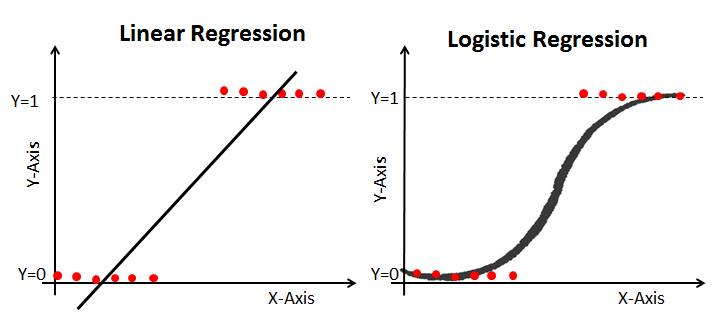

### Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

### Linear Regression Equation:

$y=β_0+β_1X_1+β_2X_2+β_3X_3+...$
 
In this tutorial, we are going to implement the same step by step.

Lets start by importing all the necissary libraries

In [11]:
import numpy as np                   # numpy
import pandas as pd                  # pandas
import matplotlib.pyplot as plt      # matplotlib
%matplotlib inline                   
import seaborn as sns                # seaborn plotting library
from sklearn.linear_model import LinearRegression  # Linear Regression libarary - to show diff between linear and losgistic regresion
from sklearn.linear_model import LogisticRegression # logistic Regression Library

In [12]:
Default = pd.read_excel('./Data/Default.xlsx',index_col=0)
Default

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


***
**STEP 1** : Convert the YES , NO to 1 and 0 respectively.This is beacause our algorithms can work with numbers only.

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
full_pipeline = ColumnTransformer([("lable_cols", OrdinalEncoder(), [0,1])],remainder='passthrough')
data = pd.DataFrame(full_pipeline.fit_transform(Default),columns=Default.columns)
data['default']= data.default.astype(int)
data['student'] = data.student.astype(int)
data

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


***
Lets first try understand what is the problem with using Linear Regression here. To uderstand that we take below steps:
1. Plot one example column against default. Lets plot balance vs default
2. Fit a linear Regression line to this plot and see what are issues it would cause

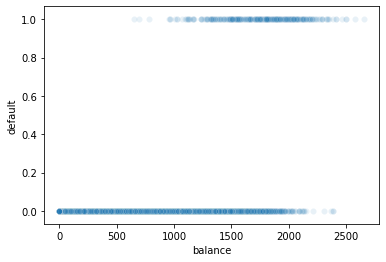

In [15]:
sns.scatterplot(data['balance'],data['default'],alpha = .1)

In [16]:
#create the linear regression model
lin_model = LinearRegression().fit(data['balance'].values.reshape(-1,1),data['default'].values.reshape(-1,1))

In [17]:
# Calculate y redicted values & getting the slope(b1) and intercept (b0)
y_pred_linear = lin_model.predict(data['balance'].values.reshape(-1,1))
b1 = lin_model.coef_
b0 = lin_model.intercept_

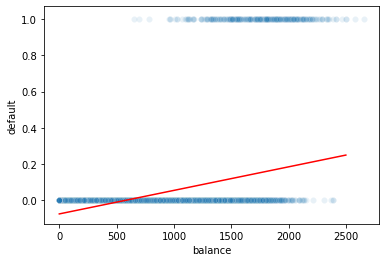

In [18]:
sns.scatterplot(data['balance'],data['default'],alpha = .1)
x = np.arange(0,2500)
sns.lineplot(x=x,y=b0+x*b1.flatten(),color='red')

### Issues with fitting a straight line through this data
1. There would be values less than 0 and greater than 1, which cannot be interpreted as probabilities
2. The change from 0 to 500 is not the same as change from 1500 to 2000, the default probability jumps by orders of magnitude - there is no linearity here. With Linear Regression marginal rates are constant.
3. And hence we need an S shape curve - These type of curve are called sigmoid curves. They good extreemely good job in these type of situations.
4. There are many types of sigmoid curves - the two most popular ones are

    + logit and 
    + Probit.
    
    
we would use Logistic Regression

5.Logistic Regression is of form 
\begin{equation*}
y = \frac{1}{1+e^{ a+bx}}
\end{equation*}

Lets plot a curve from the equation and see how it looks

Text(-400, 0.8, '$y =\\frac{1}{1+e^{ a+bx}}$')

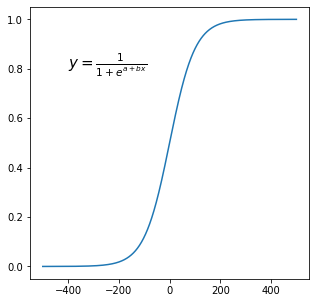

In [19]:
import math
a = .01
b = .02
x = np.arange(-500,500)
y = 1/(1+np.exp(-(a+b*x)))
fig = plt.figure(figsize=(5,5))
sns.lineplot(x,y)
plt.text(-400,.8,s=r'$y =\frac{1}{1+e^{ a+bx}}$',fontsize=15)

***
Our objective is to fit the best logistic curve to our data points. Similar to how Linear regression finds best B0 and B1 to fit the best curve - Logistic regression fits the best curve by selecting optimal a and b

Lets observe this equation and try guess the range of values it can take
\begin{equation*}
y = \frac{1}{1+e^{ a+bx}}
\end{equation*}

For very large values of x like $\infty$, the term (a+bx) becomes very large and for very small values of x like $-\infty$, it turns very small. 

$e^{{\infty}}$ is $\infty$ and $e^{{-\infty}}$ is 0
and if we extrapolate y can take values only between 0 and 1

now the equation
\begin{equation*}
y = \frac{1}{1+e^{ a+bx}}
\end{equation*}
can be also written as 
\begin{equation*}
log\left(\frac{y}{1-y}\right) = {a+bx}
\end{equation*}

now if y is the probability of something happening then 1-y is the probability of something not happening. 

The term $\left(\frac{y}{1-y}\right)$ is called the ODDS RATIO
and $log\left(\frac{y}{1-y}\right)$ is called LOG ODDS

so LOG of Odds ration or LOG ODDS is Linear 

Cost Function

We will first begin with the cost function that will compute the cost difference between the actual and the predicted values. The cost function also called as the loss function used in the tutorial is given as

$J=y\;log\:\hat{y}\;+\;(1−y)\;log\:(1−\hat{y})$
 
This cost of loss function is also known as Binary Cross-Entropy

While in Linear Regression our algorithm tried to minimize $J = y-\hat{y}$ this becomes difficut because y is a complicated function w.r.t. coeeficients in logistic regression 

### Lets try impliment this model and see how we can measure the model accuracy

As with any project - we will first try get some sence of how our data looks like

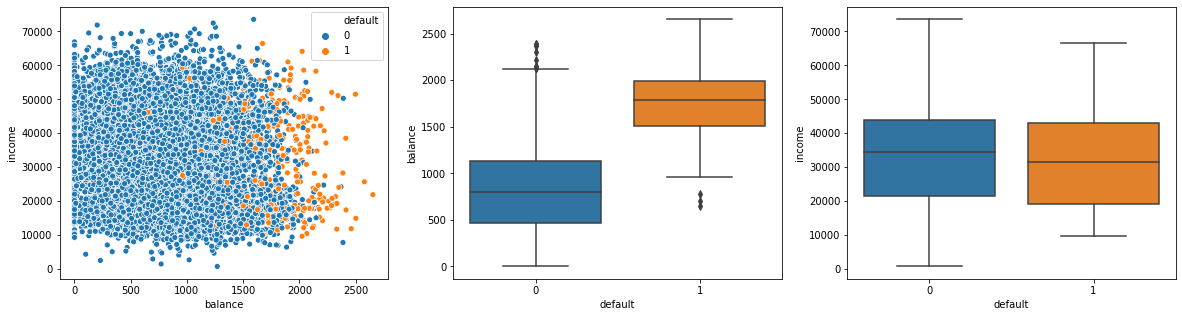

In [20]:
fig = plt.figure(figsize=(20,5))
ax1 = plt.subplot(131)
sns.scatterplot(x=data['balance'],y=data['income'],hue=data['default'])
ax2 = plt.subplot(132)
sns.boxplot(x=data['default'],y=data['balance'])
ax3 = plt.subplot(133)
sns.boxplot(x=data['default'],y=data['income'])

In [21]:
pd.crosstab(data['student'],data['default'])

default,0,1
student,,
0,6850,206
1,2817,127


***
### Observations
1. This is a severly imbalanced data set i.e. the predicted variable has many more non defaults compared to defaults - we will see how it impacts us later in this notebooks
2. People with high balance are more likely to default.(for this dataset balance means outstanding payments)
3. Income does not play such a significant role in people defaulting
4. What can you infer from the cross tab ? Prob(default) = 3.33% ; prob(default| student) = 4.313% (CONDITIONAL PROBABILITIES)

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
X = data.drop(['default'],axis=1)
y= data['default'].values.reshape(-1,1)
clf.fit(X,y)

C:\Users\brk3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = clf.predict(X)

***
### Measuring how good our model is

We can measure how good our model is by creating something called a confusion matrix. 

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

A confustion matrix for our problem is 

In [24]:
pd.crosstab(y_pred,y.flatten(),colnames=['actual'],rownames=['pred'],margins=True)

actual,0,1,All
pred,,,
0,9609,271,9880
1,58,62,120
All,9667,333,10000


***
This can also be done by sklearn library as below
***

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y))

[[9609  271]
 [  58   62]]


What can we learn from this matrix?

There are two possible predicted classes: "yes" and "no". If we were predicting the default, for example, "yes" would mean a default, and "no" would mean no default. The classifier made a total of 10,000 predictions. Lets first read our confustion matrix. Think of it as 


<table>
  <tr>
    <th></th>
    <th>Actual NO Default</th>
    <th>Actual Default</th>
  </tr>
  <tr>
      <td><b>Predicted NO Default</b> </td>
    <td>9609 <b>TN</b></td>
    <td>271 <b>FN</b></td>
  </tr>
  <tr>
    <td><b>Predicted Default<b></td>
    <td>58 <b>FP</b></td>
    <td>62 <b>TP</b></td>
  </tr>
</table>

Predicted No Default : 9609	+ 271 = 9880
Predicted Default    : 58	+ 62 = 	120

Among the Predicted Defaults of 120, 58 were actually not defaulters so our model was wrong here but 62 were actual defaulters
similaryly amonth the predcted no defaulters , 9609 were actually not defaulters so our model got these correct  howeever 271 of people we predicted as no-defaulters - were actually defaulters so our model was wrong here. 
    
We need a measure of capture all of this, for that we would need to understand a few terminologies:


1. <b>true positives (TP)</b>: These are cases in which we predicted yes (they default), and they do actually default.62
2. <b>true negatives (TN)</b>: We predicted no, and they don't default. 9609
3. <b>false positives (FP)</b>: We predicted yes (they default), but they don't actually default. (Also known as a "Type I error.") 58
4. <b>false negatives (FN)</b>: We predicted no, but they actually default. (Also known as a "Type II error.") 271
    
Now there are quite a lot of terms used, you can read about these [here](https://en.wikipedia.org/wiki/Confusion_matrix)
    
But a few metrics widely used are :
    
    
 <b>1. Accuracy :</b> Measure of how many we got right. TP + TN / TOTAL 
    In our case this becomes 62 + 9609 / 10,000 = 96.71%
    
    
 <b>2. Precision :</b> Of the ones we predicted as default, how many were actual default. Measure of Predictive value TP / TP +FP
    In our case this becomes 62 / (62 + 58)  = 51.6 %
    
    
 <b>3. Recall :</b> Of all the actual defaulters, how many our model was able to capture correctly TP / (TP + FN),
    In our case this becomes 62 / (62+271) = 18.56%

### We can get all of these calculations directly in a report in sklearn

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9667
           1       0.52      0.19      0.27       333

    accuracy                           0.97     10000
   macro avg       0.74      0.59      0.63     10000
weighted avg       0.96      0.97      0.96     10000



# END OF NOTEBOOK